In [4]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import plot
from matplotlib import pyplot as plt

df = pd.read_csv("../data/btc.csv", names=['date', 'price'], 
                 parse_dates=True, index_col='date')
# df2 = pd.DataFrame(df)
df2 = df.copy()
arr = np.array(df['price'])
mean = df['price'].mean()
std = df['price'].std()
minimum = df['price'].min()
maximum = df['price'].max()
df2['price'] = (df2['price'] - mean) / std
df['price'] = (df['price'] - minimum) / (maximum - minimum)
#f1 = plot(df)
#plt.show(f1)
#f2 = plot(df2)
#plt.show(f2)

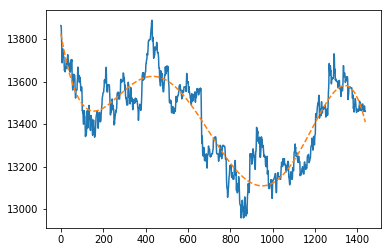

In [9]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import plot
from matplotlib import pyplot as plt

df = pd.read_csv('../data/coinbaseUSD_1-min_data_2014-12-01_to_2018-03-27.csv')

df['time'] = pd.to_datetime(df['Timestamp'],unit='s')
df_tp = df[['time','Weighted_Price']]
df17_18 = df_tp[(df_tp['time'] > '2018-01-01 00:00:00') & (df_tp['time'] < '2018-01-01 23:59:00')]
df17_18.set_index('time', inplace=True)

x = np.array(range(len(df17_18)))
y = df17_18['Weighted_Price']
p = np.poly1d(np.polyfit(x, y, 5))
plt.plot(x, y, '-', x, p(x), '--')
#['Weighted_Price'].plot()
#df17_18.plot()
plt.show()

85 85


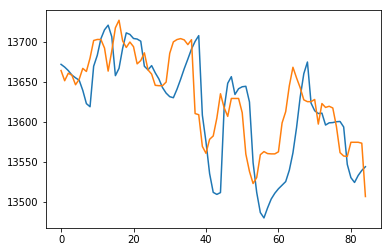

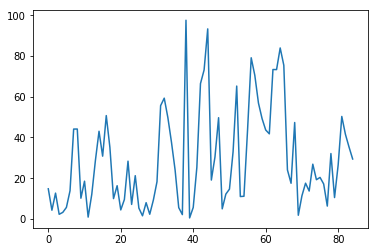

In [168]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import plot
from matplotlib import pyplot as plt

def plot_polynomial_fit(data_df, p):
    x = np.array(range(len(data_df)))
    y = data_df['price']
    plt.plot(x, y, '-', x, p(x), '--')
    plt.show()
    

def predict(df, batch_size=30, correction_threshold=20, debug=False):
    count = len(df)
    squared_errors = []
    errors = []
    prediction = []
    # print(count - batch_size)
    p = None
    skip = 0
    increased_error = 0
    for i in range(0, count - batch_size):
        batch_df = df.take(range(i + skip, i + batch_size))
        x = np.array(range(batch_size - skip))
        y = batch_df['price']
        p = np.poly1d(np.polyfit(x, y, 1))
        error = p(batch_size - skip + 1) - df.iloc[i+batch_size]['price']
        errors.append(error)
        prediction.append(p(batch_size - skip + 1))
        if i > 0 and abs(error) > abs(errors[-2]):
            increased_error +=1
            # print(increased_error)
        else:
            increased_error = 0            
        if debug:
            plot_polynomial_fit(batch_df, p)
#         if error**2 > correction_threshold:
#             skip = batch_size - 7
#             print('skip:', skip, abs(error))
        if increased_error >= 5 or error > 20:
            skip = batch_size - 5
            #print('skip:', skip, abs(error))
        else:
            skip = max(0, skip-1)
            #print('skip:', skip)
        # print(i, i + batch_size, df.iloc[i+batch_size]['price'], error)
        # print(i)
    d = {'prediction': prediction,
         'error': errors, 
         'abs_error': list(map(lambda x: abs(x), errors)),
         'squared_error': list(map(lambda x: x**2, errors))
        }
    print(len(errors), len(prediction))
    result_df = pd.DataFrame(d)
    # return (errors, abs_error, squared_errors)
    return result_df, p

   
df = pd.read_csv('../data/coinbaseUSD_1-min_data_2014-12-01_to_2018-03-27.csv')
df['time'] = pd.to_datetime(df['Timestamp'], unit='s')
df = df[['time','Weighted_Price']]
df = df.rename(index=str, columns={"Weighted_Price": "price"})
df = df[(df['time'] > '2018-01-01 00:00:00')]
df = df.reset_index()
# df.set_index('time', inplace=True)
# df.take(range(0,30))
# df.iloc[[0]]
batch_size = 15
total = 100
error_df, p = predict(df.take(range(0, total)), batch_size, 300, False)
error_df['prediction'].plot()
df.take(range(batch_size+1, total+1)).reset_index()['price'].plot()
plt.show()
error_df['abs_error'].plot()
plt.show()
# predict(df)
# df.take(range(0, 32))